In [1]:
%matplotlib inline

# Import Dependencies

We begin by importing the necessary libraries.

In [2]:
# Data storage
from google.colab import drive

# Data analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
from tqdm import tqdm

# Machine learning
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Mount Google Drive

For storage, we mount our Google Drive to this Colab instance, as if it were a local file system.

In [3]:
# Mount Google Drive to Colab Instance
drive.mount('/content/drive')
# Change directory to where the data are stored
%cd '/content/drive/MyDrive/Coursework/Year 3 (Junior Year)/Fall 2021/CSIT 496 - Machine Learning/Homeworks'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Coursework/Year 3 (Junior Year)/Fall 2021/CSIT 496 - Machine Learning/Homeworks


# Data Generation

Next, we generate the training/test data based on the following distributions:
*   800 blue +'s following a Gaussian distribution, centered at `(10, 10)`
*   200 blue +'s following a uniform distribution within the range `[0, 20)`
*   1000 red x's following a uniform distribution within the range `[0, 20)`

Note that we refer to the blue +'s as Class 0, and the red x's as Class 1.

100%|██████████| 1000/1000 [00:00<00:00, 92954.74it/s]


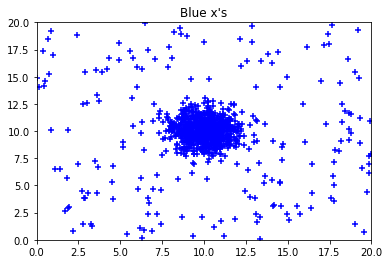

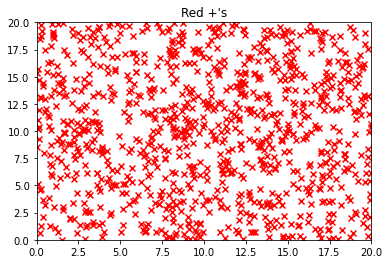

In [4]:
# Generate blue +'s
x1 = [(np.random.normal(loc=10), np.random.normal(loc=10)) for _ in tqdm(range(800))]
x1.extend([(np.random.uniform(high=20), np.random.uniform(high=20)) for _ in tqdm(range(200))])

# Generate red x's
x2 = [(np.random.uniform(high=20), np.random.uniform(high=20)) for _ in tqdm(range(1000))]

# Visualize data
plt.scatter([x[0] for x in x1], [y[1] for y in x1], c='b', marker='+')
plt.title('Blue x\'s')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

plt.scatter([x[0] for x in x2], [y[1] for y in x2], c='r', marker='x')
plt.title('Red +\'s')
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

In [5]:
# Combine the blue +'s and red x's
x1.extend(x2)
X = x1
# Generate labels
y = [0 for _ in tqdm(range(1000))]
y.extend([1 for _ in tqdm(range(1000))])

100%|██████████| 1000/1000 [00:00<00:00, 1307859.06it/s]


Write the data to `HW1_data.csv`. 

Notice that at this point, the data is still nicely sorted, which is fine since it's good practice to randomly shuffle after reading in the data anyway. Indeed, this is what we do in the following section.

In [6]:
with open('HW1_data.csv', 'w') as f: 
  for _ in range(len(X)):
    print(f'{X[_][0]}, {X[_][1]}, {y[_]}\n', file=f)

# Data Preparation

Read in the contents of `HW1_data.csv`, and display the first 5 rows of the data.

In [7]:
col_names = ['X1', 'X2', 'label']
pima = pd.read_csv('HW1_data.csv', header=None, names=col_names)

# Shuffle DataFrame and reset index beforehand
pima = pima.sample(frac=1).reset_index(drop=True)
pima.head()

,X1,X2,label
0,8.813663,6.044637,1
1,7.803099,11.324660,0
2,16.308343,19.931280,1
3,19.882303,6.106871,0
4,12.269815,11.759437,0


Specify our features and target variable, before splitting the data into `train` and `test`.

In [8]:
feature_cols = ['X1', 'X2']
# Features
X = pima[feature_cols]
# Target variable
y = pima.label

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=1)

# Build Model

For our use-case, it suffices to build a decision tree with `max_depth=2`.

In [10]:
model = DecisionTreeClassifier(max_depth=2)

# Train

We train our model using the model's `.fit()` method.

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Predictions

Then, we make predictions on the test set, and measure the accuracy of our model.

In [12]:
predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print(f'Accuracy of model: {accuracy}')

Accuracy of model: 0.7816666666666666


# Model Visualization

For vanity's sake, let's "look under the hood" to see what our decision tree model is really doing.

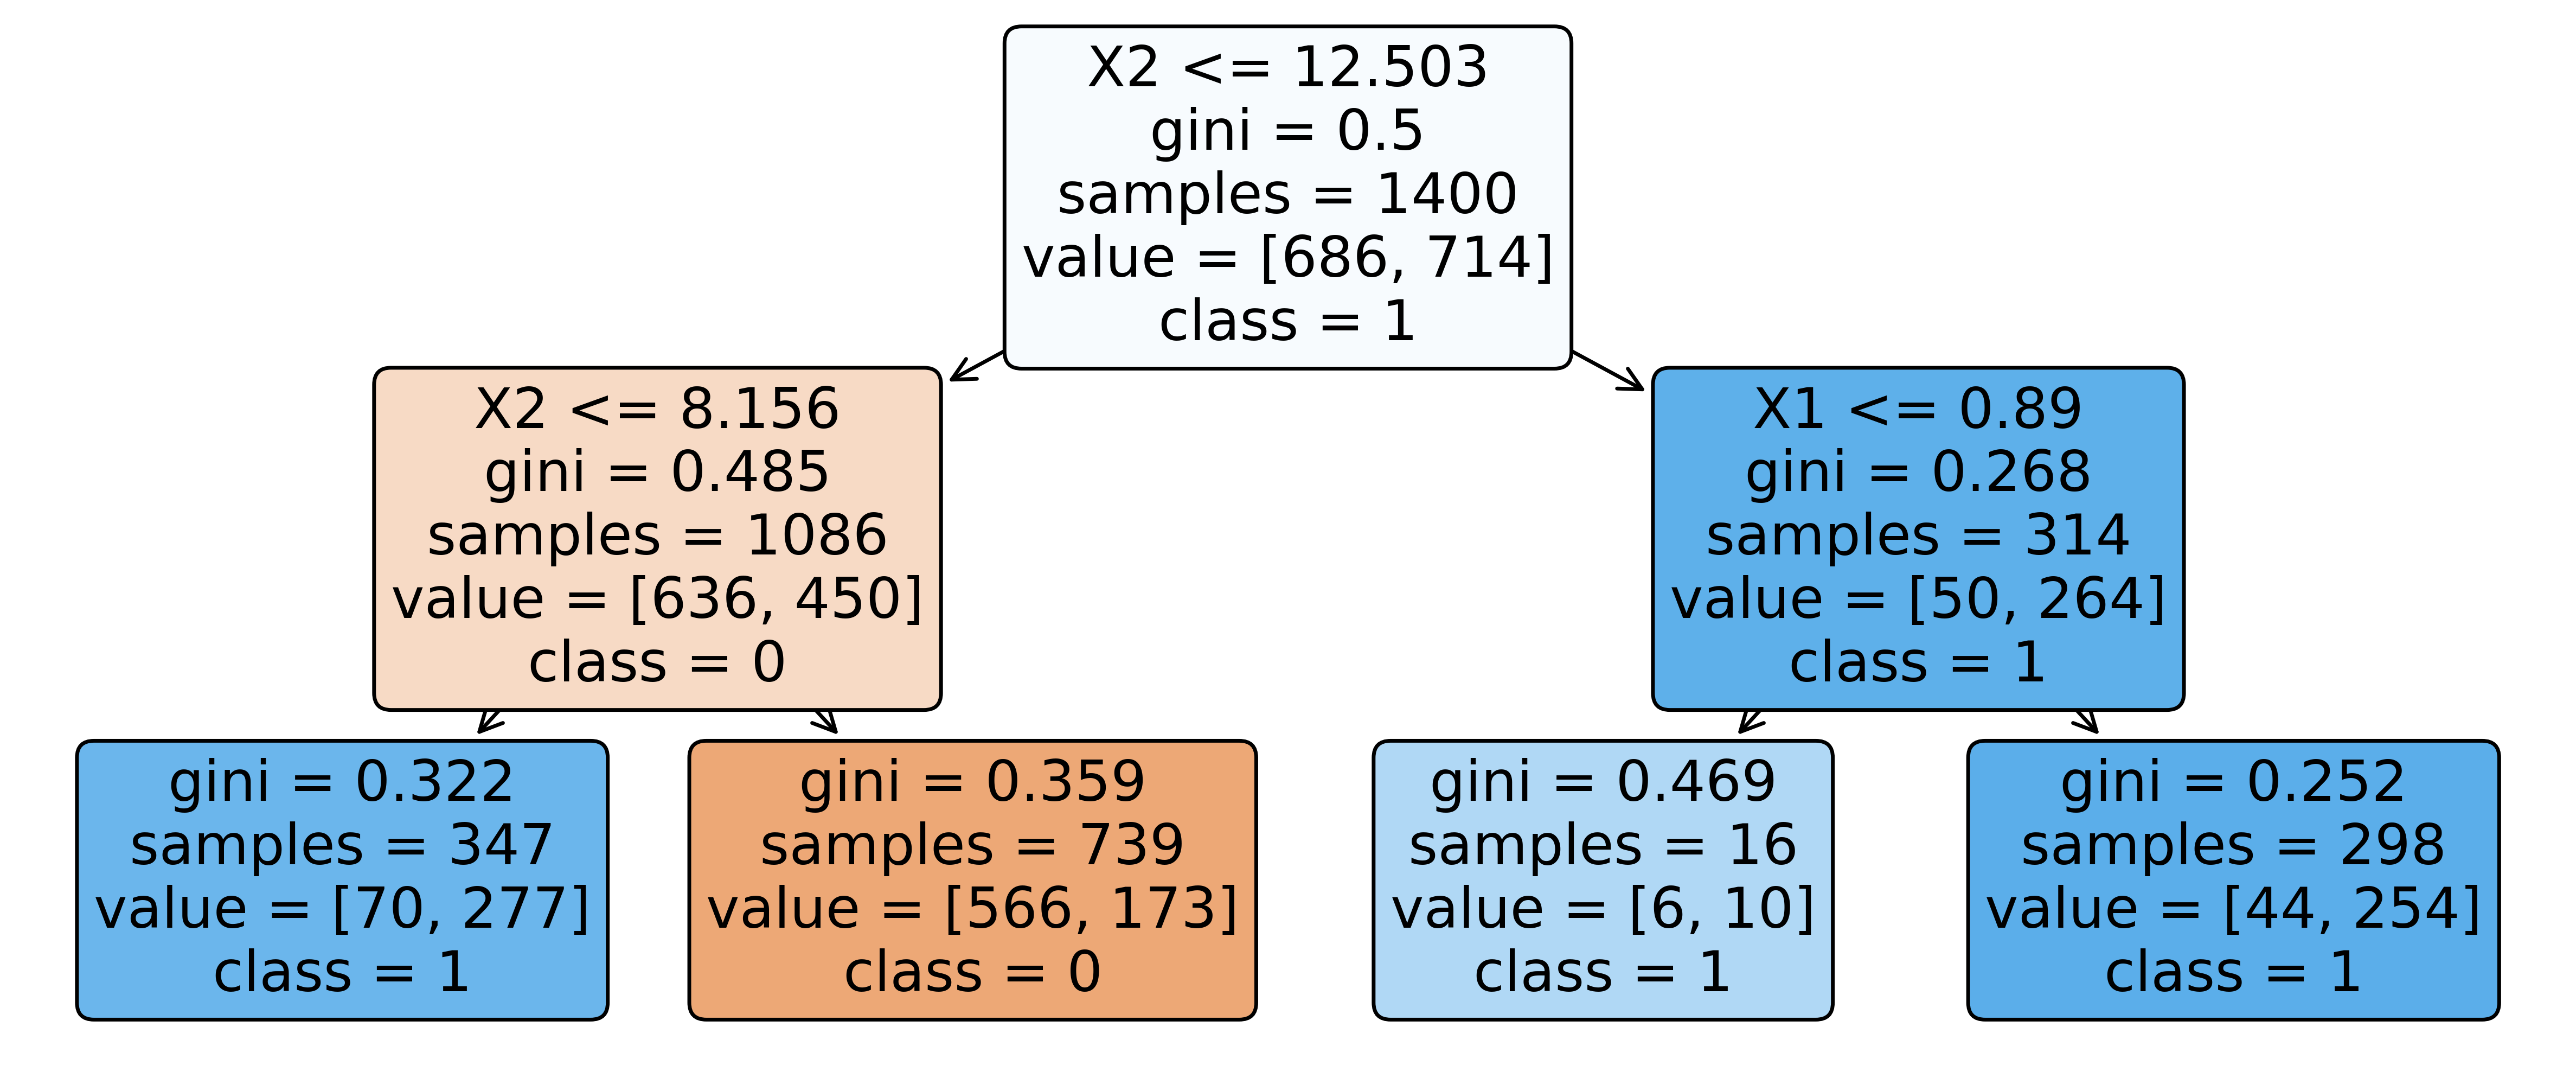

In [13]:
plt.figure(figsize=(12, 5), dpi=500)
tree.plot_tree(model, 
               feature_names=feature_cols, 
               class_names=['0', '1'],
               filled=True,
               rounded=True)
plt.savefig('HW1_decision_tree.png')